<a href="https://colab.research.google.com/github/kenanmorani/Machine_Learning_idu/blob/main/CIFAR-100/CNN1_cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
# Installing keras
!pip uninstall keras
!pip install keras

Uninstalling Keras-2.4.3:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/Keras-2.4.3.dist-info/*
    /usr/local/lib/python3.6/dist-packages/docs/*
    /usr/local/lib/python3.6/dist-packages/keras/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.6/dist-packages/docs/md_autogen.py
    /usr/local/lib/python3.6/dist-packages/docs/update_docs.py
Proceed (y/n)? y
  Successfully uninstalled Keras-2.4.3
  Using cached https://files.pythonhosted.org/packages/44/e1/dc0757b20b56c980b5553c1b5c4c32d378c7055ab7bfa92006801ad359ab/Keras-2.4.3-py2.py3-none-any.whl


In [1]:
# Importing the required libraries and tools
import keras
from keras.datasets import cifar100
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
from keras.regularizers import l2
from keras.callbacks import Callback, LearningRateScheduler, TensorBoard, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.constraints import max_norm
from __future__ import print_function
from keras import backend as K
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Defining some constant related to image segmentation
BATCH_SIZE = 100 
NUM_CLASSES = 100 # NUmber of the classes in the output 
# The optimizer constants
MOMENTUM_RATE = 0.9
LEARNING_RATE = 0.01

LOG_DIR = './logs'
MODEL_PATH = './keras_cifar100_model.h5'

In [3]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

In [4]:
# CHeching the dementions of the images in the dataset
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


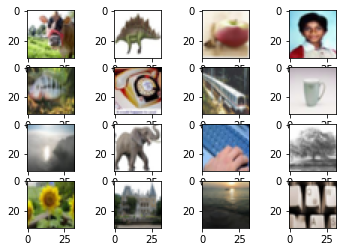

In [ ]:
# Looking at the first 14 images of the cifar100 dataset
m=4
k=0
plt.figure(1)
for i in range(0,m):
  for j in range(0,m):
    plt.subplot2grid((m,m),(i,j))
    plt.imshow(x_train[k])
    k=k+1
plt.show()


In [5]:
# Changing the type of images to categorical
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)
print(y_train.shape,y_test.shape)

(50000, 100) (10000, 100)


In [6]:
# Scaling and Normalizing
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

In [7]:
# Building a CNN model
model = Sequential()
model.add(ZeroPadding2D(4, input_shape=x_train.shape[1:]))
# Stack 1:
model.add(Conv2D(384, (3, 3), padding='same', kernel_regularizer=l2(0.01)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(INIT_DROPOUT_RATE))
# Stack 2:
model.add(Conv2D(384, (1, 1), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Conv2D(384, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Conv2D(640, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Conv2D(640, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(INIT_DROPOUT_RATE))
# Stack 3:
model.add(Conv2D(640, (3, 3), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Conv2D(768, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Conv2D(768, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Conv2D(768, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(INIT_DROPOUT_RATE))
# Stack 4:
model.add(Conv2D(768, (1, 1), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Conv2D(896, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Conv2D(896, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(INIT_DROPOUT_RATE))
# Stack 5:
model.add(Conv2D(896, (3, 3), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Conv2D(1024, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Conv2D(1024, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(INIT_DROPOUT_RATE))
# Stack 6:
model.add(Conv2D(1024, (1, 1), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Conv2D(1152, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(INIT_DROPOUT_RATE))
# Stack 7:
model.add(Conv2D(1152, (1, 1), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(INIT_DROPOUT_RATE))
model.add(Flatten())
model.add(Dense(NUM_CLASSES))
model.add(Activation('softmax'))

In [8]:
# Checking the summary of the CNN model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 40, 40, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 40, 40, 384)       10752     
_________________________________________________________________
activation (Activation)      (None, 40, 40, 384)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 20, 20, 384)       0         
_________________________________________________________________
dropout (Dropout)            (None, 20, 20, 384)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 384)       147840    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 384)       5

In [9]:
# Defining the optimizer (Stochastic Gradient Decent)
opt = SGD(lr=LEARNING_RATE, momentum=MOMENTUM_RATE)

In [10]:
# Compiling the model
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy', 'top_k_categorical_accuracy'])


In [11]:
# Dataaugmentation on the model
datagen = ImageDataGenerator(samplewise_center=True,
                             zca_whitening=True,
                             horizontal_flip=True
                            )

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [12]:
datagen.fit(x_train)

In [13]:
train_flow = datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)
valid_flow = datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)

In [ ]:
# Fitting the model into the augmented dataset
model.fit_generator(train_flow,
                    epochs=30,
                    validation_data=valid_flow,
                    validation_steps=(len(x_train) / BATCH_SIZE))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
500/500 [==============================] - 344s 672ms/step - loss: 11.1509 - accuracy: 0.0160 - top_k_categorical_accuracy: 0.0726 - val_loss: 10.5824 - val_accuracy: 0.0257 - val_top_k_categorical_accuracy: 0.1027
Epoch 2/30
500/500 [==============================] - 335s 671ms/step - loss: 10.1990 - accuracy: 0.0411 - top_k_categorical_accuracy: 0.1689 - val_loss: 9.3245 - val_accuracy: 0.1081 - val_top_k_categorical_accuracy: 0.3206
Epoch 3/30
500/500 [==============================] - 335s 670ms/step - loss: 9.2603 - accuracy: 0.0915 - top_k_categorical_accuracy: 0.3041 - val_loss: 8.4897 - val_accuracy: 0.1629 - val_top_k_categorical_accuracy: 0.4248
Epoch 4/30
500/500 [==============================] - 336s 672ms/step - loss: 8.4678 - accuracy: 0.1389 - top_k_categorical_accuracy: 0.4025 - val_loss: 7.7088 - val_accuracy: 0.2212 - val_top_k_categorical_accuracy: 0.5179
Epoch 5/30
500/500 [==============================] - 336s 671ms/step - loss: 7.7810 - accuracy: 0.18